<h5 align="right">Zachary Morrison <br />
PHY 353L - Modern Physics Lab <br />
Greg Sitz <br />
June 9, 2023</h5>

# Practice Data Analysis - part 1

In order to start, I've imported the necessary Python packages and the data file I'll be using.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

data = "SampleData_Summer2023.dat"

Next I defined some useful classes that I've made to handle the position data and have particle objects that can hold this data.

In [7]:
class Position:
    def __init__(self, time, x_position, y_position, z_position) -> None:
        self.t = time
        self.x = x_position
        self.y = y_position
        self.z = z_position
    def __str__(self) -> str:
        return "(" + ', '.join(str(v) for v in vars(self).values()) + ")"

class Particle:
    def __init__(self) -> None:
        self.t = []
        self.x = []
        self.y = []
        self.z = []

    def add_pos(self, position) -> None:
        self.t.append(position.t)
        self.x.append(position.x)
        self.y.append(position.y)
        self.z.append(position.z)

### Problem #1
Below I open the data file using the `with open` function. Next I turn each line of the file into an array and comprehend each line to be split into their six respective Particle objects (`objs`). Lastly, I plot all of the x values of the first three particles vs. their times. The figure can be seen below this code block:

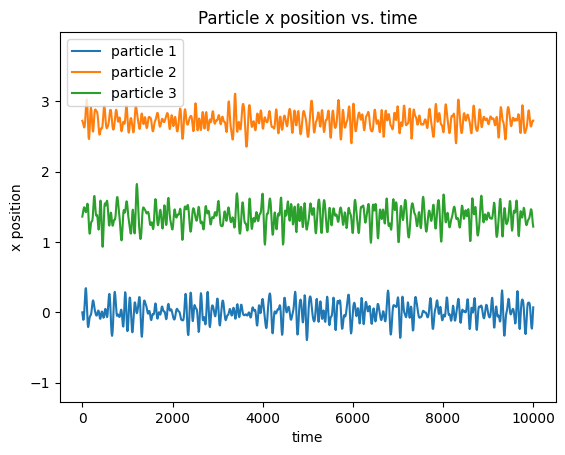

In [8]:
objs = [Particle() for i in range(6)]
with open(data, "r") as f:
    for line in f:
        line = [float(i) for i in line.split()]
        for i in range(6):
            objs[i].add_pos(Position(line[0], line[(3 * i) + 1], 
                                     line[(3 * i) + 2], line[(3 * i) + 3]))
fig, ax = plt.subplots(1, 1)
for obj in objs[:3]:
    ax.plot(obj.t, obj.x, label = "particle " + str(objs.index(obj) + 1))
    ax.set_ymargin(0.25)
    ax.set_xlabel("time")
    ax.set_ylabel("x position")
    ax.set_title("Particle x position vs. time")
plt.legend()
plt.show()

### Problem #2

In the code block below I calculated the mean and standard deviation of all six particles on all of their axes. They are printed directly below the code:

In [9]:
print("\t\t X Mean\t X SD\t Y Mean\t Y SD\t Z Mean\t Z SD")
for i in objs:
    print("particle", str(objs.index(i) + 1), "\t", np.round(np.mean(i.x), 3), 
          "\t", np.round(np.std(i.x), 3), "\t", np.round(np.mean(i.y), 3), 
          "\t", np.round(np.std(i.y), 3), "\t", np.round(np.mean(i.z), 3), 
          "", np.round(np.std(i.z), 3))

		 X Mean	 X SD	 Y Mean	 Y SD	 Z Mean	 Z SD
particle 1 	 0.002 	 0.128 	 0.003 	 0.119 	 -0.026  0.144
particle 2 	 2.722 	 0.114 	 0.002 	 0.11 	 -0.025  0.177
particle 3 	 1.363 	 0.141 	 2.358 	 0.118 	 -0.027  0.16
particle 4 	 4.082 	 0.137 	 2.359 	 0.11 	 -0.023  0.165
particle 5 	 0.001 	 0.123 	 1.57 	 0.097 	 -2.235  0.11
particle 6 	 2.721 	 0.124 	 1.57 	 0.102 	 -2.232  0.123
